In [15]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pingouin as pg
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')

In [2]:
overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data2/All States All Data Collected.xlsx')
overall_data.head()

,State,code,Medicare Expansion Adoption,Unnamed: 3,% overweight or obese,"% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000","Mortality Rate per 100,000",...,Health Good,Health Very Good,Health Excellent,Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),"% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
0,Alabama,AL,Not Adopted,Not Expanded,0.697,19.2,224.7,170.4,51.5,918.1,...,0.340,0.286,0.145,0.6168,0.1245,0.1030,0.1557,0.13649,0.264,0.120369
1,Alaska,AK,Adopted,Expanded,0.642,19.1,129.7,141.5,40.0,700.3,...,0.316,0.313,0.214,0.6462,0.1380,0.1063,0.1095,0.13306,0.261,0.106147
2,Arizona,AZ,Adopted,Expanded,0.647,14.0,136.4,131.9,31.0,669.2,...,0.315,0.304,0.187,0.6574,0.1227,0.0946,0.1253,0.14871,0.325,0.082839
3,Arkansas,AR,Adopted,Expanded,0.705,22.7,217.4,168.8,41.5,876.6,...,0.323,0.293,0.137,0.6058,0.1260,0.1082,0.1600,0.11855,0.178,0.071597
4,California,CA,Adopted,Expanded,0.622,11.2,139.7,135.0,37.0,609.0,...,0.330,0.304,0.185,0.6317,0.1460,0.1083,0.1139,0.12155,0.279,0.076538


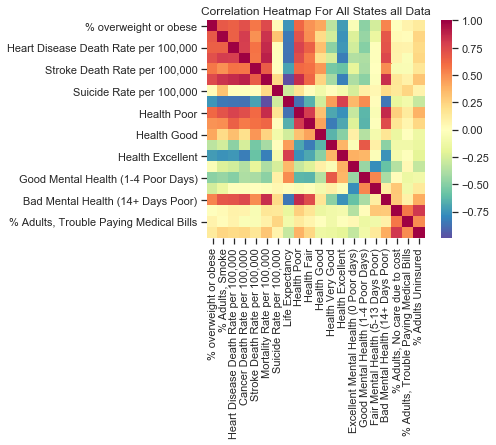

In [12]:
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)
plt.title('Correlation Heatmap Matrix')

plt.title('Correlation Heatmap For All States all Data')
plt.savefig('Heatmap_all_states_all_data.png')

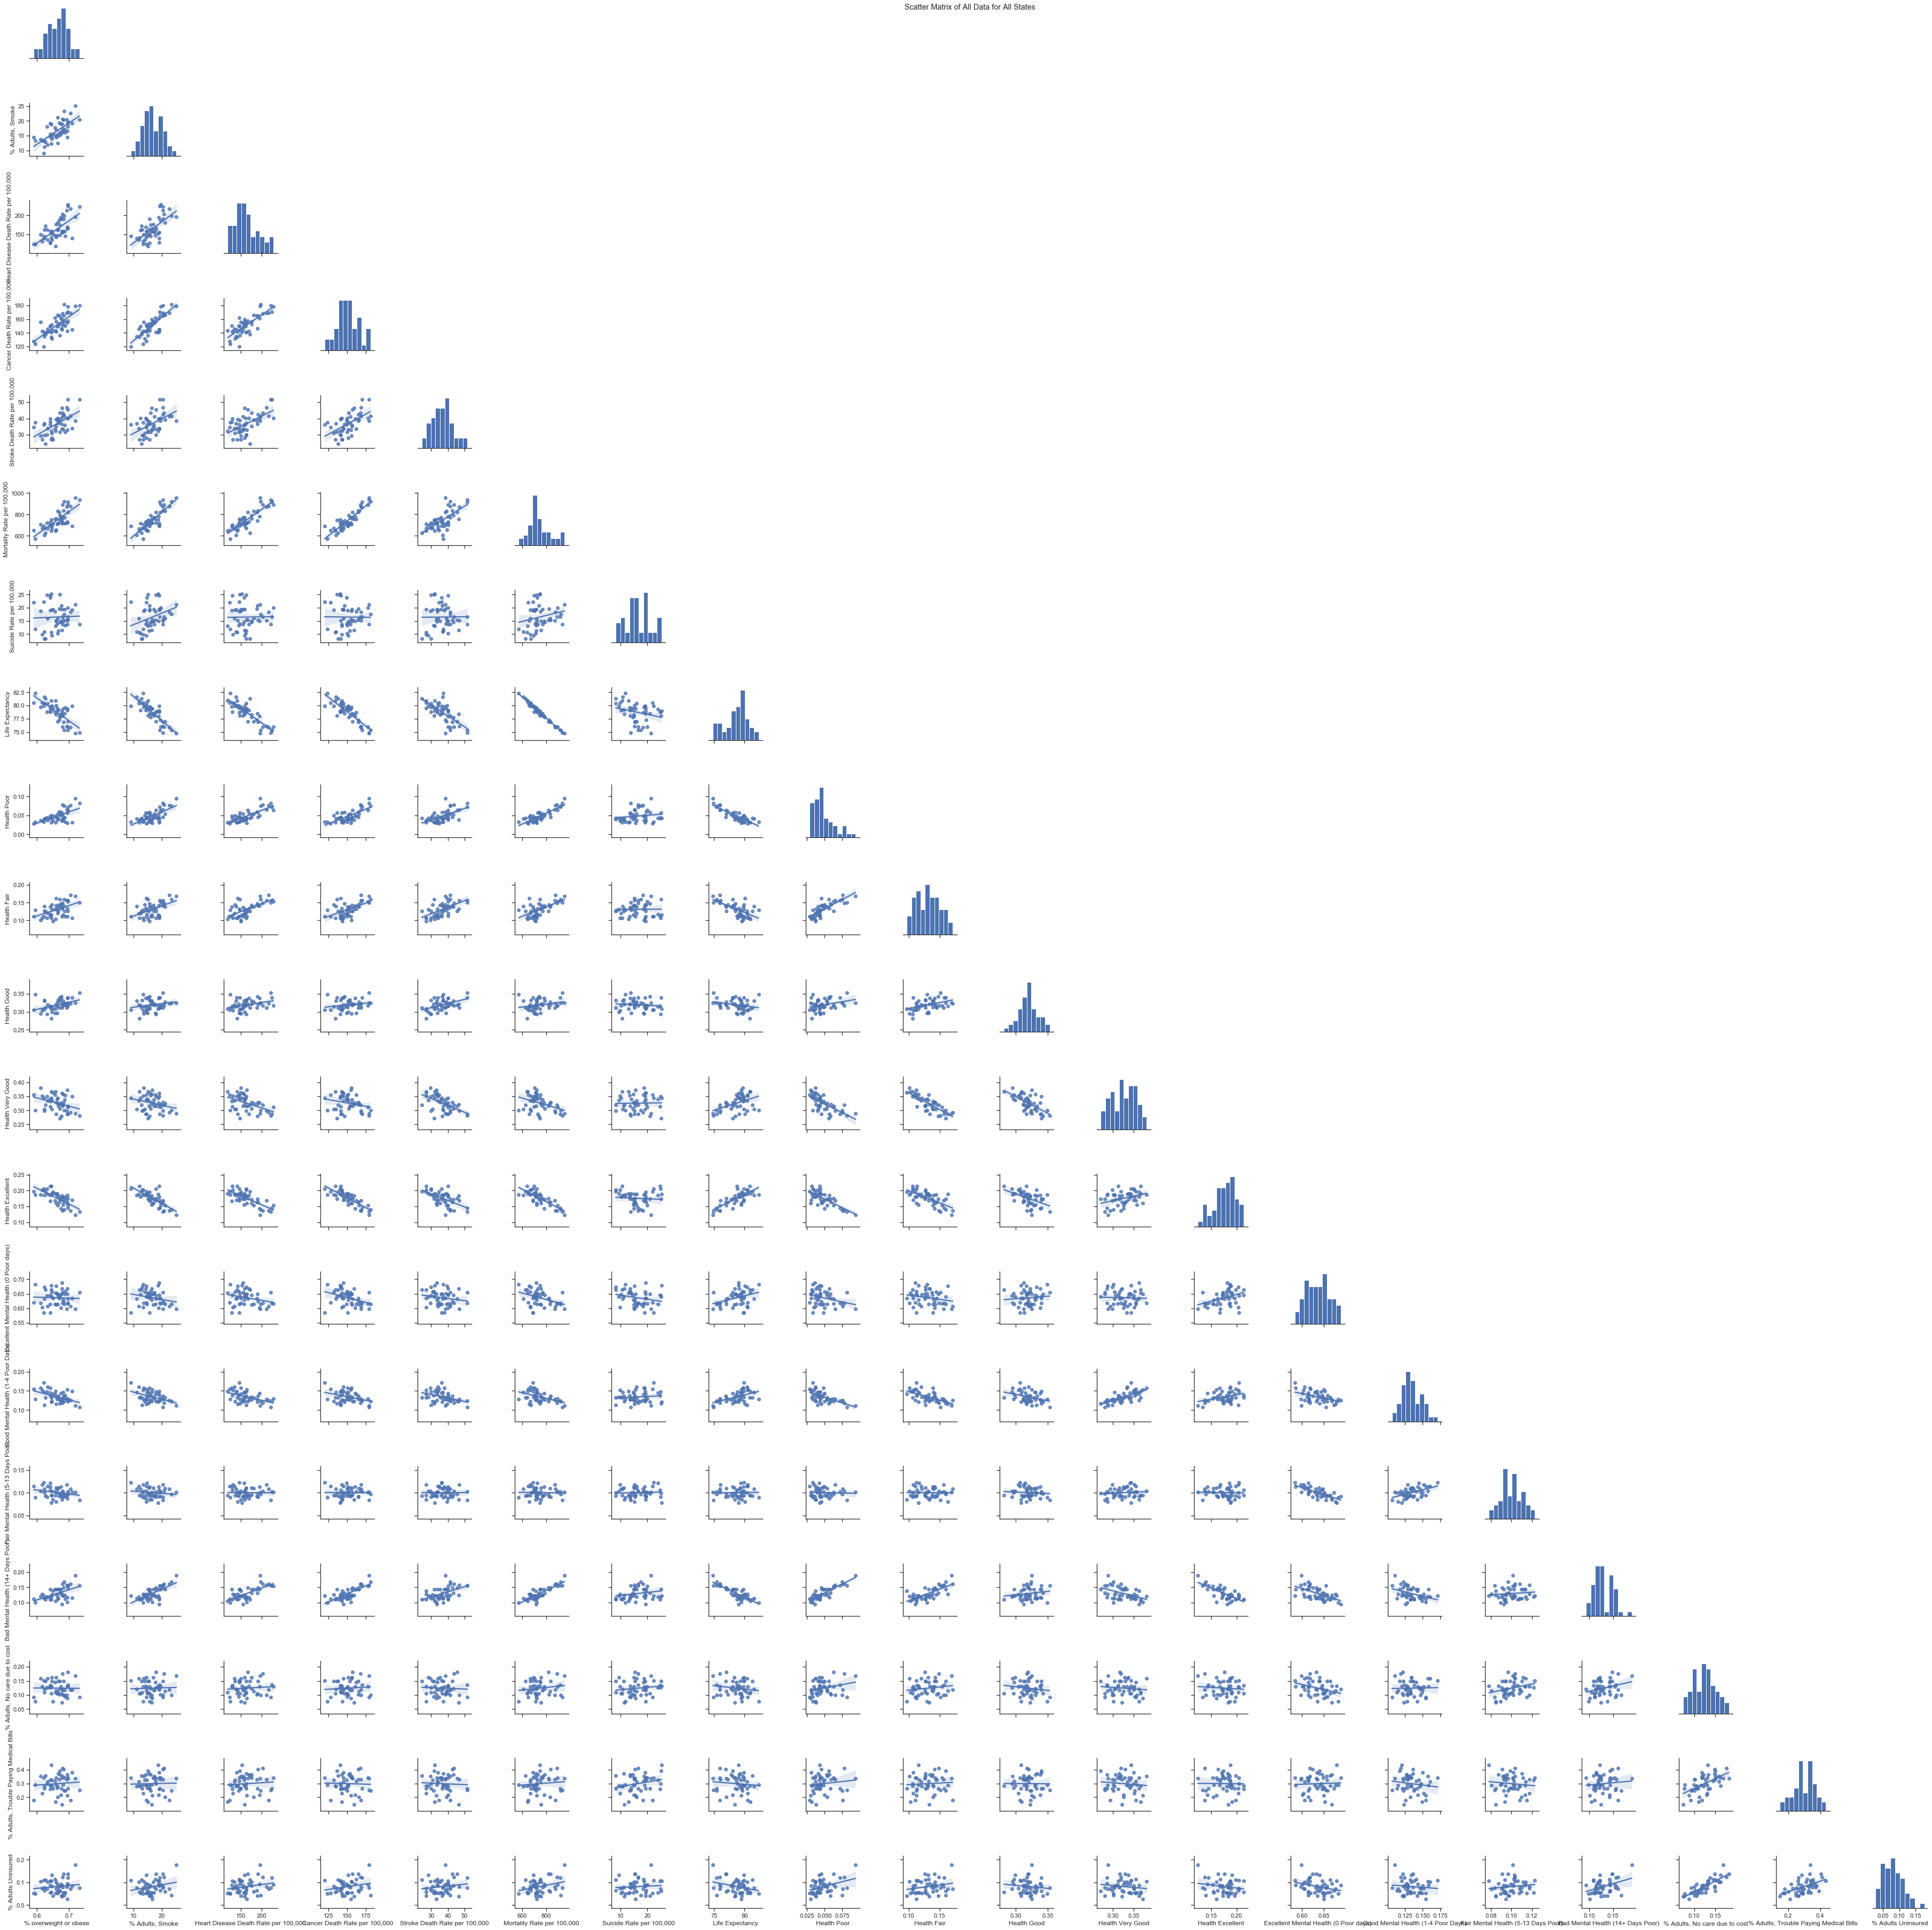

In [4]:

sns.set(style="ticks")

g = sns.pairplot(overall_data, kind = 'reg', corner=True)
g.fig.suptitle("Scatter Matrix of All Data for All States", y=1)
plt.savefig('Scatter_Matrix_all_states_all_data.png')

Text(0.5, 0.92, 'Histograms for All Data for All States')

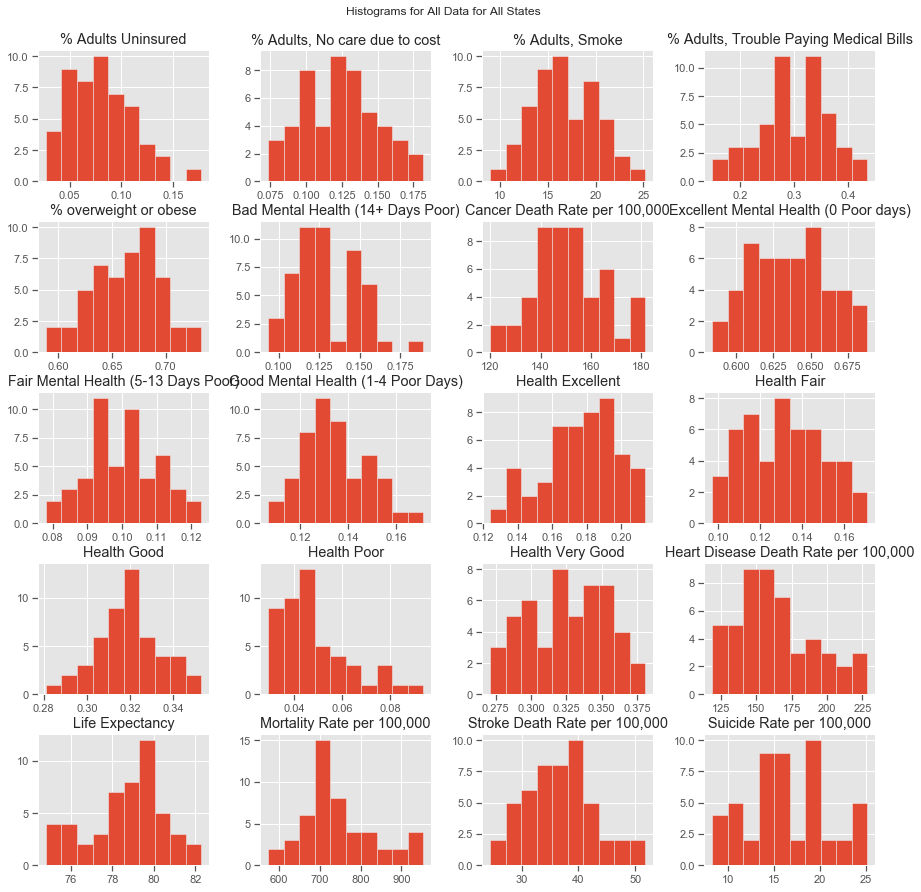

In [23]:
overall_data.hist(figsize = (15,15))

plt.savefig("All_States_All_Data_Histograms.png")
pl.suptitle("Histograms for Data for All States" , y = .92)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb748d1c390>,
      dtype=object)

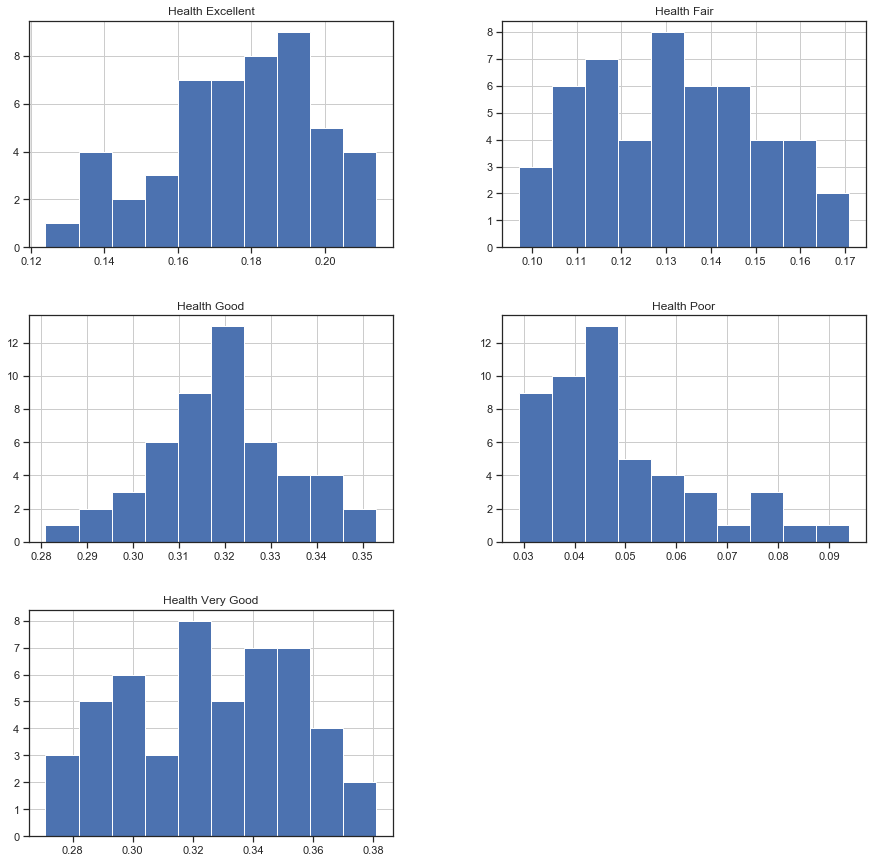

In [6]:
overall_data.loc[:,['Health Poor' ,'Health Fair', 'Health Good', 'Health Very Good', 'Health Excellent']].hist(figsize = (15,15))

In [7]:

overall_data.describe()

,% overweight or obese,"% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000","Mortality Rate per 100,000","Suicide Rate per 100,000",Life Expectancy,Health Poor,Health Fair,Health Good,Health Very Good,Health Excellent,Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),"% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.663220,16.64800,164.296000,151.514000,36.808000,747.468000,16.450000,78.699200,0.048180,0.131160,0.319280,0.325680,0.175660,0.635984,0.134302,0.100204,0.129520,0.124328,0.299040,0.081703
std,0.031512,3.31584,27.927566,14.349216,6.108069,89.540226,4.511674,1.796046,0.014948,0.019202,0.014912,0.027639,0.021536,0.026092,0.013965,0.010608,0.019879,0.026162,0.065401,0.030327
min,0.589000,9.00000,119.000000,120.000000,24.400000,572.500000,8.300000,74.790000,0.029000,0.097000,0.281000,0.271000,0.124000,0.583600,0.106600,0.078100,0.093500,0.073460,0.149000,0.027210
25%,0.642500,14.50000,145.875000,141.975000,32.400000,690.675000,13.700000,77.837500,0.037250,0.113750,0.311250,0.304000,0.163250,0.614850,0.124800,0.092900,0.114325,0.105210,0.263250,0.056302
50%,0.665500,16.25000,158.900000,150.550000,36.800000,723.600000,15.700000,79.070000,0.044000,0.130500,0.319000,0.325500,0.180000,0.637050,0.132450,0.100150,0.123850,0.121645,0.295500,0.078932
75%,0.684750,19.07500,179.550000,160.675000,40.250000,788.225000,19.300000,79.880000,0.055500,0.143750,0.329500,0.348500,0.188750,0.654025,0.144350,0.108125,0.143450,0.147410,0.341750,0.101761
max,0.733000,25.20000,228.500000,181.600000,51.800000,953.800000,25.200000,82.290000,0.094000,0.171000,0.353000,0.381000,0.214000,0.688400,0.171200,0.122900,0.189400,0.181990,0.436000,0.176901


Text(0.5, 1.0, '% overweight or obese')

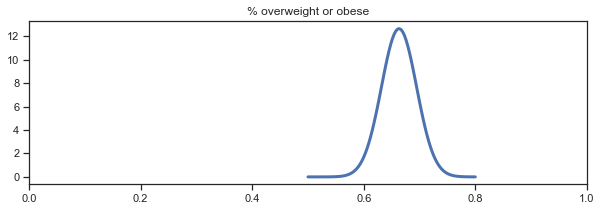

In [8]:
fig, ax = plt.subplots(1, figsize=(10, 3))

difference_in_proportions = stats.norm(0.663220, 0.031512)
#overall_data.loc["% overweight or obese"].hist()
x = np.linspace(.5, .8, num=100)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(0, 1)
ax.set_title("% overweight or obese")

In [9]:
adopted = overall_data.groupby('Medicare Expansion Adoption')
adopted.describe()

% overweight or obese                             \
                                            count      mean       std    min   
Medicare Expansion Adoption                                                    
Adopted                                      37.0  0.655973  0.031552  0.589   
Not Adopted                                  13.0  0.683846  0.021102  0.644   

                                                        % Adults, Smoke  \
                               25%    50%    75%    max           count   
Medicare Expansion Adoption                                               
Adopted                      0.633  0.658  0.676  0.720            37.0   
Not Adopted                  0.678  0.681  0.695  0.733            13.0   

                                        ...  \
                                  mean  ...   
Medicare Expansion Adoption             ...   
Adopted                      16.329730  ...   
Not Adopted                  17.553846  ...   

                            % Adults, Trouble Paying Medical Bills         \
                                                               75%    max   
Medicare Expansion Adoption                                                 
Adopted                                                      0.337  0.405   
Not Adopted                                                  0.365  0.436   

                            % Adults Uninsured                                \
                                         count      mean       std       min   
Medicare Expansion Adoption                                                    
Adopted                                   37.0  0.079512  0.031421  0.027210   
Not Adopted                               13.0  0.087937  0.027146  0.053887   

                                                                     
                                  25%       50%       75%       max  
Medicare Expansion Adoption                                          
Adopted                      0.055742  0.076538  0.101714  0.176901  
Not Adopted                  0.070565  0.084664  0.105625  0.137747  

[2 rows x 160 columns]

KeyError: 'Medicare Expansion Adoption'

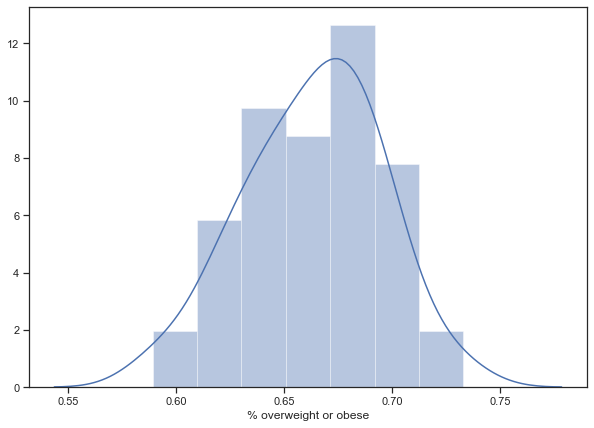

In [10]:


plt.figure(figsize=(10,7))
sns.distplot(overall_data.loc[:,"% overweight or obese"])
sns.distplot(overall_data.loc[:,"% overweight or obese"].groupby('Medicare Expansion Adoption'), color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(50,75)
plt.legend();